In [5]:
!pip install opencv-python 

  Using cached opencv_python-4.7.0.72-cp37-abi3-win_amd64.whl (38.2 MB)


In [1]:
import tensorflow as tf
import os
import cv2
import imghdr
import numpy as np
from matplotlib import pyplot as plt

In [2]:
data_dir = 'data' 
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [3]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))

In [4]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 329 files belonging to 2 classes.


In [5]:
data_iterator = data.as_numpy_iterator()

In [6]:
batch = data_iterator.next()

In [7]:
data = data.map(lambda x,y: (x/255, y))

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


In [8]:
# train_size = int(len(data) * 0.7)
# val_size = int(len(data) * 0.2)
# test_size = int(len(data) * 0.1)
train_size = 8
val_size = 2
test_size = 1

In [9]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size + val_size).take(test_size)

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

##### Testes de tamanho do treino

In [125]:
model = Sequential()

In [126]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [127]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [128]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 127, 127, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 62, 62, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 30, 30, 16)      

In [11]:
logdir='logs'

In [129]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [130]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
8/8 [==============================] - 16s 2s/step - loss: 0.8817 - accuracy: 0.5273 - val_loss: 0.6860 - val_accuracy: 0.5938
Epoch 2/20
8/8 [==============================] - 15s 2s/step - loss: 0.6886 - accuracy: 0.4727 - val_loss: 0.6636 - val_accuracy: 0.5156
Epoch 3/20
8/8 [==============================] - 16s 2s/step - loss: 0.6591 - accuracy: 0.5547 - val_loss: 0.6585 - val_accuracy: 0.4688
Epoch 4/20
8/8 [==============================] - 15s 2s/step - loss: 0.6346 - accuracy: 0.5273 - val_loss: 0.6085 - val_accuracy: 0.5938
Epoch 5/20
8/8 [==============================] - 14s 1s/step - loss: 0.5524 - accuracy: 0.7227 - val_loss: 0.4697 - val_accuracy: 0.8594
Epoch 6/20
8/8 [==============================] - 15s 2s/step - loss: 0.4838 - accuracy: 0.7695 - val_loss: 0.4727 - val_accuracy: 0.7500
Epoch 7/20
8/8 [==============================] - 15s 2s/step - loss: 0.3955 - accuracy: 0.8203 - val_loss: 0.2842 - val_accuracy: 0.9062
Epoch 8/20
8/8 [==================

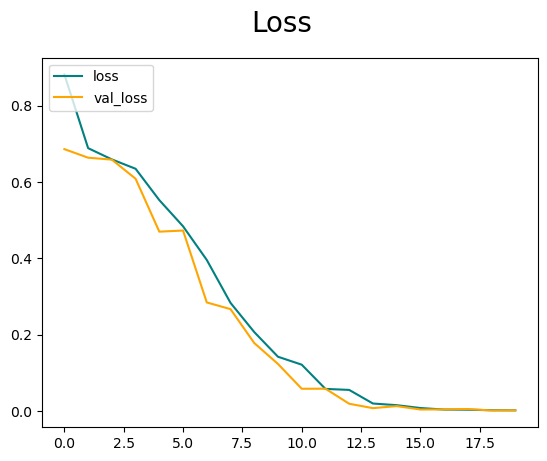

In [131]:
# modelo 1
# treino/validação/teste = 8/2/1
# épocas de treino: 20

fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

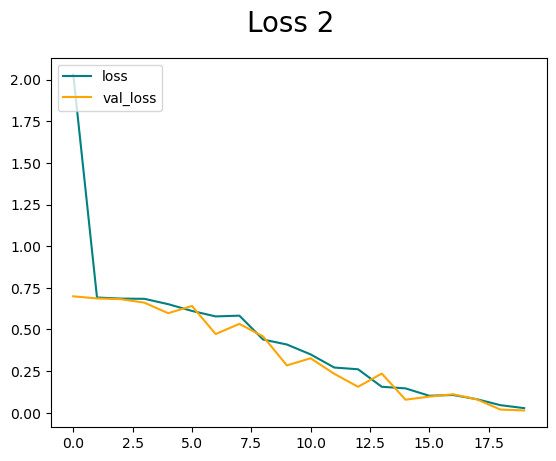

In [80]:
# modelo 2
# treino/validação/teste = 7/2/2
# épocas de treino: 20

fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss 2', fontsize=20)
plt.legend(loc="upper left")
plt.show()

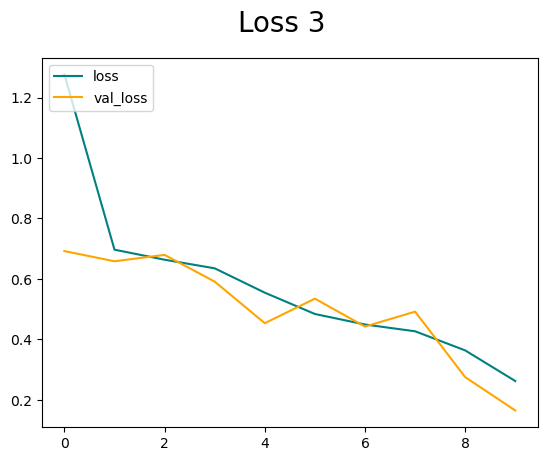

In [106]:
# modelo 3
# treino/validação/teste = 8/2/1
# épocas de treino: 10

fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss 3', fontsize=20)
plt.legend(loc="upper left")
plt.show()

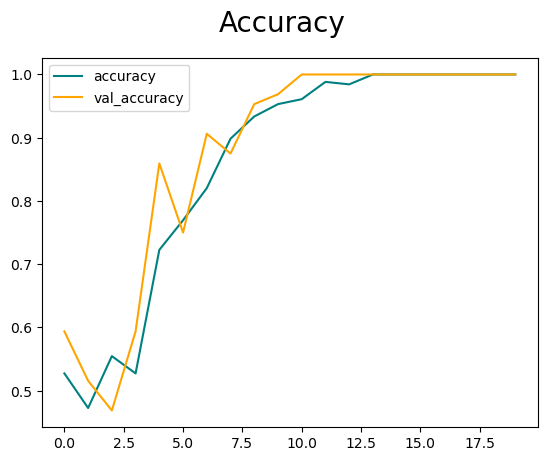

In [132]:
# modelo 1
# treino/validação/teste = 8/2/1
# épocas de treino: 20

fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

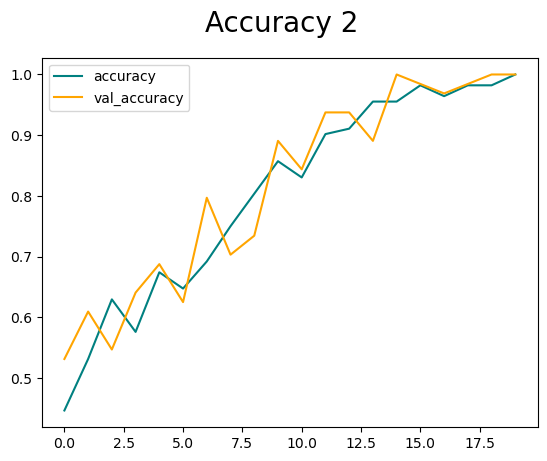

In [81]:
# modelo 2
# treino/validação/teste = 7/2/2
# épocas de treino: 20

fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy 2', fontsize=20)
plt.legend(loc="upper left")
plt.show()

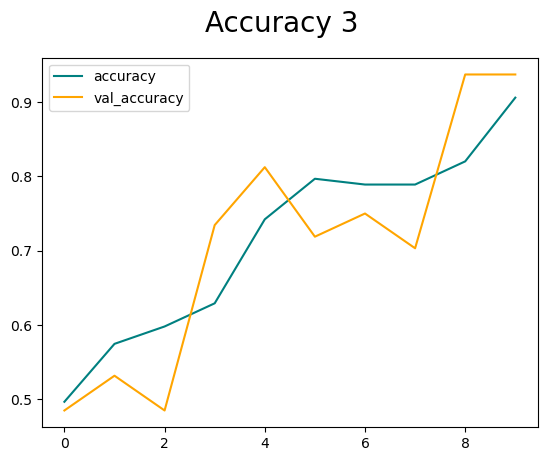

In [108]:
# modelo 3
# treino/validação/teste = 8/2/1
# épocas de treino: 10

fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy 3', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [12]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy


In [13]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [134]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)


1/1 [==============================] - 0s 152ms/step


In [135]:
# outros modelos deu bom
print(pre.result(), re.result(), acc.result())

tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)


In [110]:
#modelo 3
print(pre.result(), re.result(), acc.result())

tf.Tensor(0.9677419, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(0.9830508, shape=(), dtype=float32)


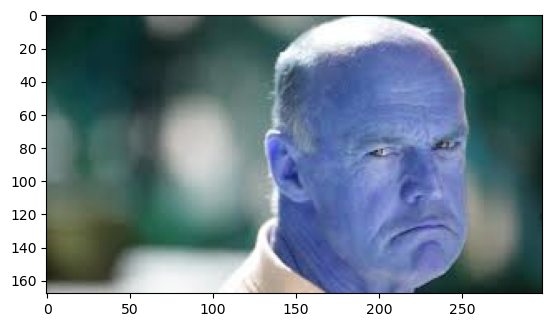

In [136]:
img = cv2.imread('testAngry.jfif')
plt.imshow(img)
plt.show()

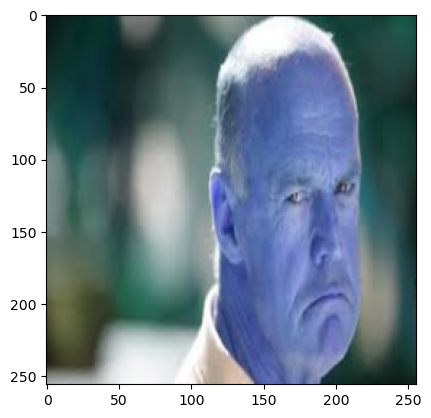

In [137]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [138]:
# teste 1 modelo 1
yhat = model.predict(np.expand_dims(resize/255, 0))
yhat

1/1 [==============================] - 0s 34ms/step


array([[0.16923456]], dtype=float32)

In [89]:
# teste 1 modelo 2
yhat = model.predict(np.expand_dims(resize/255, 0))
yhat

1/1 [==============================] - 0s 41ms/step


array([[0.30623814]], dtype=float32)

In [113]:
# teste 1 modelo 3
yhat = model.predict(np.expand_dims(resize/255, 0))
yhat

1/1 [==============================] - 0s 34ms/step


array([[0.7364191]], dtype=float32)

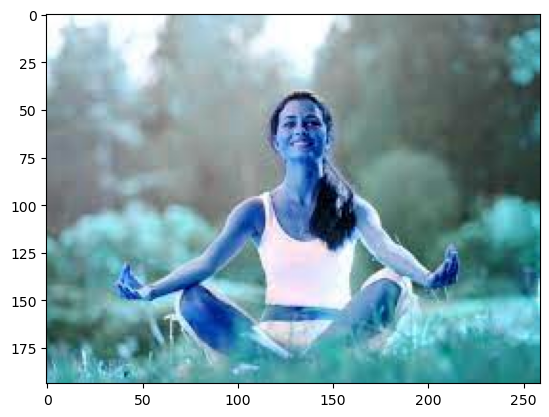

In [139]:
img = cv2.imread('testCalm.jfif')
plt.imshow(img)
plt.show()

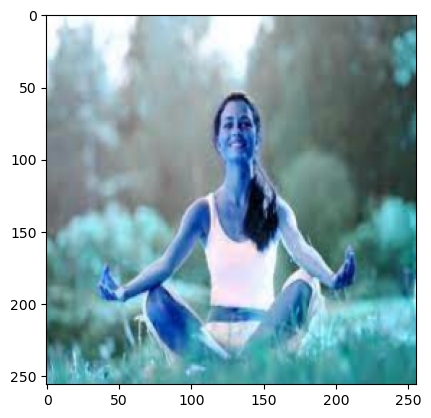

In [140]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [141]:
# teste 2 modelo 1
yhat = model.predict(np.expand_dims(resize/255, 0))
yhat

1/1 [==============================] - 0s 36ms/step


array([[0.99314785]], dtype=float32)

In [92]:
# teste 2 modelo 2
yhat = model.predict(np.expand_dims(resize/255, 0))
yhat

1/1 [==============================] - 0s 35ms/step


array([[0.8245367]], dtype=float32)

In [117]:
# teste 2 modelo 3
yhat = model.predict(np.expand_dims(resize/255, 0))
yhat

1/1 [==============================] - 0s 40ms/step


array([[0.7432223]], dtype=float32)

In [14]:
from tensorflow.keras.models import load_model


In [32]:
model.save(os.path.join('models','imageclassifier.h5'))

In [34]:
new_model = load_model('models/imageclassifier.h5')

In [35]:
new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 87ms/step


array([[0.9986923]], dtype=float32)

##### Testes de Arquitetura

In [15]:
# os resultados dele já foram testados como modelo 1 nos testes de antes
modeloPrimario = Sequential()

In [19]:
modeloPrimario.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
modeloPrimario.add(MaxPooling2D())
modeloPrimario.add(Conv2D(32, (3,3), 1, activation='relu'))
modeloPrimario.add(MaxPooling2D())
modeloPrimario.add(Conv2D(16, (3,3), 1, activation='relu'))
modeloPrimario.add(MaxPooling2D())
modeloPrimario.add(Flatten())
modeloPrimario.add(Dense(256, activation='relu'))
modeloPrimario.add(Dense(1, activation='sigmoid'))

In [20]:
novoModelo = Sequential()

In [ ]:
mnovoModelo.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
